Pipeline is based on this notebook:
https://www.kaggle.com/ashydv/country-clustering-hierarchical-clustering-pca

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline
import matplotlib.colors as colors
# Data display coustomization
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-pyj330zg because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Load data
data = pd.read_csv('dataset_for_clustering.csv')
data.head(2)

,Unnamed: 0,Unnamed: 0.1,province,municipality,geom,amenity_counts,school_count,hospital_count,pop,tot_tax_revenue,tot_current_oper_income,pop_density,Unnamed: 0.1.1,Point,coordinates,magnitude,time,mean_mag_2010,mean_mag_2011,mean_mag_2012,mean_mag_2013,mean_mag_2014,mean_mag_2015,mean_mag_2016,mean_mag_2017,...,strong_2010,strong_2011,strong_2012,strong_2013,strong_2014,strong_2015,strong_2016,strong_2017,strong_2018,strong_2019,strong_2020,strong_2021,major_2010,major_2011,major_2012,major_2013,major_2014,major_2015,major_2016,major_2017,major_2018,major_2019,major_2020,major_2021,upper_90_mag
0,0,0,Abra,Bangued,"MULTIPOLYGON (((120.62709808 17.49300003, 120....",44,2.0,[0],48163.0,36.55629364,230.5770761,4575788.400856371,0.0,['POINT (119.8464 16.4895)'],"[119.8464, 16.4895, 37]",[5.5],['2015-11-07 19:40:13.550'],0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,[5.5]
1,1,1,Abra,Boliney,"MULTIPOLYGON (((120.99041748 17.39801979, 120....",9,[0],[0],3573.0,0.03563294,56.68988294,230078.97825372792,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]


In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'province', 'municipality', 'geom',
       'amenity_counts', 'school_count', 'hospital_count', 'pop',
       'tot_tax_revenue',
       ...
       'major_2013', 'major_2014', 'major_2015', 'major_2016', 'major_2017',
       'major_2018', 'major_2019', 'major_2020', 'major_2021', 'upper_90_mag'],
      dtype='object', length=102)

In [4]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)

In [5]:
data.columns

Index(['province', 'municipality', 'geom', 'amenity_counts', 'school_count',
       'hospital_count', 'pop', 'tot_tax_revenue', 'tot_current_oper_income',
       'pop_density', 'Point', 'coordinates', 'magnitude', 'time',
       'mean_mag_2010', 'mean_mag_2011', 'mean_mag_2012', 'mean_mag_2013',
       'mean_mag_2014', 'mean_mag_2015', 'mean_mag_2016', 'mean_mag_2017',
       'mean_mag_2018', 'mean_mag_2019', 'mean_mag_2020', 'mean_mag_2021',
       'max_mag_2010', 'max_mag_2011', 'max_mag_2012', 'max_mag_2013',
       'max_mag_2014', 'max_mag_2015', 'max_mag_2016', 'max_mag_2017',
       'max_mag_2018', 'max_mag_2019', 'max_mag_2020', 'max_mag_2021',
       'min_mag_2010', 'min_mag_2011', 'min_mag_2012', 'min_mag_2013',
       'min_mag_2014', 'min_mag_2015', 'min_mag_2016', 'min_mag_2017',
       'min_mag_2018', 'min_mag_2019', 'min_mag_2020', 'min_mag_2021',
       'light_2010', 'light_2011', 'light_2012', 'light_2013', 'light_2014',
       'light_2015', 'light_2016', 'light_2017', '

In [6]:
import ast

In [7]:
data['magnitude'] = data['magnitude'].apply(lambda x: ast.literal_eval(x))

In [8]:
data['mean_mag_all'] = data.magnitude.apply(lambda x: np.array(x).mean())
data['max_mag_all'] = data.magnitude.apply(lambda x: np.array(x).max())

In [9]:
data['eq_count_since_2010'] = data['magnitude'].apply(lambda x: len(x))

# Data cleaning

In [10]:
features1 = ['amenity_counts', 'school_count','hospital_count', 
        'pop', 'tot_tax_revenue', 'tot_current_oper_income','pop_density',
       'mean_mag_2010', 'mean_mag_2011', 'mean_mag_2012', 'mean_mag_2013',
       'mean_mag_2014', 'mean_mag_2015', 'mean_mag_2016', 'mean_mag_2017',
       'mean_mag_2018', 'mean_mag_2019', 'mean_mag_2020', 'mean_mag_2021',
       'max_mag_2010', 'max_mag_2011', 'max_mag_2012', 'max_mag_2013',
       'max_mag_2014', 'max_mag_2015', 'max_mag_2016', 'max_mag_2017',
       'max_mag_2018', 'max_mag_2019', 'max_mag_2020', 'max_mag_2021',
       'min_mag_2010', 'min_mag_2011', 'min_mag_2012', 'min_mag_2013',
       'min_mag_2014', 'min_mag_2015', 'min_mag_2016', 'min_mag_2017',
       'min_mag_2018', 'min_mag_2019', 'min_mag_2020', 'min_mag_2021',
       'light_2010', 'light_2011', 'light_2012', 'light_2013', 'light_2014',
       'light_2015', 'light_2016', 'light_2017', 'light_2018', 'light_2019',
       'light_2020', 'light_2021', 'moderate_2010', 'moderate_2011',
       'moderate_2012', 'moderate_2013', 'moderate_2014', 'moderate_2015',
       'moderate_2016', 'moderate_2017', 'moderate_2018', 'moderate_2019',
       'moderate_2020', 'moderate_2021', 'strong_2010', 'strong_2011',
       'strong_2012', 'strong_2013', 'strong_2014', 'strong_2015',
       'strong_2016', 'strong_2017', 'strong_2018', 'strong_2019',
       'strong_2020', 'strong_2021', 'major_2010', 'major_2011', 'major_2012',
       'major_2013', 'major_2014', 'major_2015', 'major_2016', 'major_2017',
       'major_2018', 'major_2019', 'major_2020', 'major_2021',
       'eq_count_since_2010','mean_mag_all', 'max_mag_all']


In [11]:
for i in features1:
    data.loc[data[i] =='[0]', i] = 0

In [12]:
data.head(2)

,province,municipality,geom,amenity_counts,school_count,hospital_count,pop,tot_tax_revenue,tot_current_oper_income,pop_density,Point,coordinates,magnitude,time,mean_mag_2010,mean_mag_2011,mean_mag_2012,mean_mag_2013,mean_mag_2014,mean_mag_2015,mean_mag_2016,mean_mag_2017,mean_mag_2018,mean_mag_2019,mean_mag_2020,...,strong_2013,strong_2014,strong_2015,strong_2016,strong_2017,strong_2018,strong_2019,strong_2020,strong_2021,major_2010,major_2011,major_2012,major_2013,major_2014,major_2015,major_2016,major_2017,major_2018,major_2019,major_2020,major_2021,upper_90_mag,mean_mag_all,max_mag_all,eq_count_since_2010
0,Abra,Bangued,"MULTIPOLYGON (((120.62709808 17.49300003, 120....",44,2.0,0,48163.0,36.55629364,230.5770761,4575788.400856371,['POINT (119.8464 16.4895)'],"[119.8464, 16.4895, 37]",[5.5],['2015-11-07 19:40:13.550'],0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,[5.5],5.5,5.5,1
1,Abra,Boliney,"MULTIPOLYGON (((120.99041748 17.39801979, 120....",9,0,0,3573.0,0.03563294,56.68988294,230078.97825372792,[0],[0],[0],[0],0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[0],0.0,0.0,1


In [13]:
data['major_2021'].value_counts()

0.0     1083
1.0      242
0        227
2.0       37
3.0       21
4.0        9
5.0        6
6.0        4
7.0        2
9.0        1
11.0       1
Name: major_2021, dtype: int64

In [14]:
dum = ['light_2010', 'light_2011', 'light_2012', 'light_2013', 'light_2014',
   'light_2015', 'light_2016', 'light_2017', 'light_2018', 'light_2019',
   'light_2020', 'light_2021', 'moderate_2010', 'moderate_2011',
   'moderate_2012', 'moderate_2013', 'moderate_2014', 'moderate_2015',
   'moderate_2016', 'moderate_2017', 'moderate_2018', 'moderate_2019',
   'moderate_2020', 'moderate_2021', 'strong_2010', 'strong_2011',
   'strong_2012', 'strong_2013', 'strong_2014', 'strong_2015',
   'strong_2016', 'strong_2017', 'strong_2018', 'strong_2019',
   'strong_2020', 'strong_2021', 'major_2010', 'major_2011', 'major_2012',
   'major_2013', 'major_2014', 'major_2015', 'major_2016', 'major_2017',
   'major_2018', 'major_2019', 'major_2020', 'major_2021']

for i in dum:
    data[i] = data[i].astype(float)

In [15]:
# for i in dum:
#     plt.hist(data[i], label=i)
# plt.legend()

In [16]:
data.columns

Index(['province', 'municipality', 'geom', 'amenity_counts', 'school_count',
       'hospital_count', 'pop', 'tot_tax_revenue', 'tot_current_oper_income',
       'pop_density',
       ...
       'major_2016', 'major_2017', 'major_2018', 'major_2019', 'major_2020',
       'major_2021', 'upper_90_mag', 'mean_mag_all', 'max_mag_all',
       'eq_count_since_2010'],
      dtype='object', length=102)

In [17]:
stats = ['mean_mag_2010', 'mean_mag_2011', 'mean_mag_2012', 'mean_mag_2013',
       'mean_mag_2014', 'mean_mag_2015', 'mean_mag_2016', 'mean_mag_2017',
       'mean_mag_2018', 'mean_mag_2019', 'mean_mag_2020', 'mean_mag_2021',
       'max_mag_2010', 'max_mag_2011', 'max_mag_2012', 'max_mag_2013',
       'max_mag_2014', 'max_mag_2015', 'max_mag_2016', 'max_mag_2017',
       'max_mag_2018', 'max_mag_2019', 'max_mag_2020', 'max_mag_2021',
       'min_mag_2010', 'min_mag_2011', 'min_mag_2012', 'min_mag_2013',
       'min_mag_2014', 'min_mag_2015', 'min_mag_2016', 'min_mag_2017',
       'min_mag_2018', 'min_mag_2019', 'min_mag_2020', 'min_mag_2021']

for i in stats:
    data[i] = data[i].astype(float)

In [18]:
dum = ['amenity_counts', 'school_count',
       'hospital_count', 'pop', 'tot_tax_revenue', 'tot_current_oper_income',
       'pop_density']

for i in dum:
    data[i] = data[i].astype(float)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Columns: 102 entries, province to eq_count_since_2010
dtypes: float64(93), int64(1), object(8)
memory usage: 1.3+ MB


In [20]:
data['upper_90_mag'].values

array(['[5.5]', '[0]', '[4.6]', ..., '[6.6, 6.1, 7.3]', '[6.1, 7.3]',
       '[6.1, 7.3]'], dtype=object)

In [21]:
data['magnitude'].values

array([list([5.5]), list([0]), list([4.6, 5.3]), ...,
       list([6.6, 6.1, 7.6, 7.3]), list([6.1, 7.6, 7.3]),
       list([6.1, 7.6, 7.3])], dtype=object)

In [22]:
data.columns

Index(['province', 'municipality', 'geom', 'amenity_counts', 'school_count',
       'hospital_count', 'pop', 'tot_tax_revenue', 'tot_current_oper_income',
       'pop_density',
       ...
       'major_2016', 'major_2017', 'major_2018', 'major_2019', 'major_2020',
       'major_2021', 'upper_90_mag', 'mean_mag_all', 'max_mag_all',
       'eq_count_since_2010'],
      dtype='object', length=102)

In [23]:
features1 = ['amenity_counts', 'school_count','hospital_count',
        'tot_tax_revenue','pop_density',
       'mean_mag_2010', 'mean_mag_2011', 'mean_mag_2012', 'mean_mag_2013',
       'mean_mag_2014', 'mean_mag_2015', 'mean_mag_2016', 'mean_mag_2017',
       'mean_mag_2018', 'mean_mag_2019', 'mean_mag_2020', 'mean_mag_2021',
       'max_mag_2010', 'max_mag_2011', 'max_mag_2012', 'max_mag_2013',
       'max_mag_2014', 'max_mag_2015', 'max_mag_2016', 'max_mag_2017',
       'max_mag_2018', 'max_mag_2019', 'max_mag_2020', 'max_mag_2021',
       'min_mag_2010', 'min_mag_2011', 'min_mag_2012', 'min_mag_2013',
       'min_mag_2014', 'min_mag_2015', 'min_mag_2016', 'min_mag_2017',
       'min_mag_2018', 'min_mag_2019', 'min_mag_2020', 'min_mag_2021',
       'light_2010', 'light_2011', 'light_2012', 'light_2013', 'light_2014',
       'light_2015', 'light_2016', 'light_2017', 'light_2018', 'light_2019',
       'light_2020', 'light_2021', 'moderate_2010', 'moderate_2011',
       'moderate_2012', 'moderate_2013', 'moderate_2014', 'moderate_2015',
       'moderate_2016', 'moderate_2017', 'moderate_2018', 'moderate_2019',
       'moderate_2020', 'moderate_2021', 'strong_2010', 'strong_2011',
       'strong_2012', 'strong_2013', 'strong_2014', 'strong_2015',
       'strong_2016', 'strong_2017', 'strong_2018', 'strong_2019',
       'strong_2020', 'strong_2021', 'major_2010', 'major_2011', 'major_2012',
       'major_2013', 'major_2014', 'major_2015', 'major_2016', 'major_2017',
       'major_2018', 'major_2019', 'major_2020', 'major_2021',
       'eq_count_since_2010','mean_mag_all', 'max_mag_all']


In [24]:
data.head(2)

,province,municipality,geom,amenity_counts,school_count,hospital_count,pop,tot_tax_revenue,tot_current_oper_income,pop_density,Point,coordinates,magnitude,time,mean_mag_2010,mean_mag_2011,mean_mag_2012,mean_mag_2013,mean_mag_2014,mean_mag_2015,mean_mag_2016,mean_mag_2017,mean_mag_2018,mean_mag_2019,mean_mag_2020,...,strong_2013,strong_2014,strong_2015,strong_2016,strong_2017,strong_2018,strong_2019,strong_2020,strong_2021,major_2010,major_2011,major_2012,major_2013,major_2014,major_2015,major_2016,major_2017,major_2018,major_2019,major_2020,major_2021,upper_90_mag,mean_mag_all,max_mag_all,eq_count_since_2010
0,Abra,Bangued,"MULTIPOLYGON (((120.62709808 17.49300003, 120....",44.0,2.0,0.0,48163.0,36.556294,230.577076,4.575788e+06,['POINT (119.8464 16.4895)'],"[119.8464, 16.4895, 37]",[5.5],['2015-11-07 19:40:13.550'],0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,[5.5],5.5,5.5,1
1,Abra,Boliney,"MULTIPOLYGON (((120.99041748 17.39801979, 120....",9.0,0.0,0.0,3573.0,0.035633,56.689883,2.300790e+05,[0],[0],[0],[0],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0],0.0,0.0,1


In [25]:
# Check for duplicates
print(data.duplicated(subset=['province','municipality'], keep=False).sum())

0


In [26]:
data_orig = data.copy()

In [27]:
data = data[features1]
data.head(2)

,amenity_counts,school_count,hospital_count,tot_tax_revenue,pop_density,mean_mag_2010,mean_mag_2011,mean_mag_2012,mean_mag_2013,mean_mag_2014,mean_mag_2015,mean_mag_2016,mean_mag_2017,mean_mag_2018,mean_mag_2019,mean_mag_2020,mean_mag_2021,max_mag_2010,max_mag_2011,max_mag_2012,max_mag_2013,max_mag_2014,max_mag_2015,max_mag_2016,max_mag_2017,...,strong_2012,strong_2013,strong_2014,strong_2015,strong_2016,strong_2017,strong_2018,strong_2019,strong_2020,strong_2021,major_2010,major_2011,major_2012,major_2013,major_2014,major_2015,major_2016,major_2017,major_2018,major_2019,major_2020,major_2021,eq_count_since_2010,mean_mag_all,max_mag_all
0,44.0,2.0,0.0,36.556294,4.575788e+06,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.5,5.5
1,9.0,0.0,0.0,0.035633,2.300790e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0


In [28]:
data.shape

(1633, 92)

In [29]:
data.describe()

,amenity_counts,school_count,hospital_count,tot_tax_revenue,pop_density,mean_mag_2010,mean_mag_2011,mean_mag_2012,mean_mag_2013,mean_mag_2014,mean_mag_2015,mean_mag_2016,mean_mag_2017,mean_mag_2018,mean_mag_2019,mean_mag_2020,mean_mag_2021,max_mag_2010,max_mag_2011,max_mag_2012,max_mag_2013,max_mag_2014,max_mag_2015,max_mag_2016,max_mag_2017,...,strong_2012,strong_2013,strong_2014,strong_2015,strong_2016,strong_2017,strong_2018,strong_2019,strong_2020,strong_2021,major_2010,major_2011,major_2012,major_2013,major_2014,major_2015,major_2016,major_2017,major_2018,major_2019,major_2020,major_2021,eq_count_since_2010,mean_mag_all,max_mag_all
count,1633.000000,1633.000000,1633.000000,1633.000000,1.633000e+03,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,...,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000
mean,147.592162,3.582364,0.470912,72.908990,1.023095e+07,1.955524,1.043068,2.303306,0.861559,0.825420,0.914520,0.938748,2.067318,1.536310,1.933543,2.063829,0.995109,2.073791,1.052480,2.446050,0.894611,0.843601,0.929945,0.979057,2.135456,...,0.656461,0.576240,0.270667,0.258420,0.334354,0.591549,0.374158,1.132272,0.776485,0.308022,0.597061,0.267606,0.656461,0.576240,0.270667,0.258420,0.334354,0.591549,0.374158,1.132272,0.776485,0.308022,6.282303,4.909677,5.720943
std,485.701885,9.792866,1.667316,553.311197,3.593417e+07,3.073747,2.130737,3.159721,1.922978,1.768522,1.955051,1.997532,2.860360,2.555975,2.702111,2.766794,2.029206,3.257213,2.149349,3.349795,2.000630,1.810355,1.989215,2.087410,2.947974,...,1.207684,2.615559,0.682576,0.745471,0.917371,1.311844,0.735309,4.995429,2.040553,0.843830,1.109470,0.671576,1.207684,2.615559,0.682576,0.745471,0.917371,1.311844,0.735309,4.995429,2.040553,0.843830,9.082170,2.117562,2.496915
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.577933,1.746431e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.750000,5.100000
50%,44.000000,1.000000,0.000000,4.093504,3.380218e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.426667,6.500000
75%,109.000000,4.000000,0.000000,12.992682,6.426815e+06,5.200000,0.000000,5.600000,0.000000,0.000000,0.000000,0.000000,5.350000,4.300000,5.100000,5.200000,0.000000,5.200000,0.000000,6.100000,0.000000,0.000000,0.000000,0.000000,6.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00

In [30]:
# Checking for null values
data.isnull().sum()

amenity_counts         0
school_count           0
hospital_count         0
tot_tax_revenue        0
pop_density            0
                      ..
major_2020             0
major_2021             0
eq_count_since_2010    0
mean_mag_all           0
max_mag_all            0
Length: 92, dtype: int64

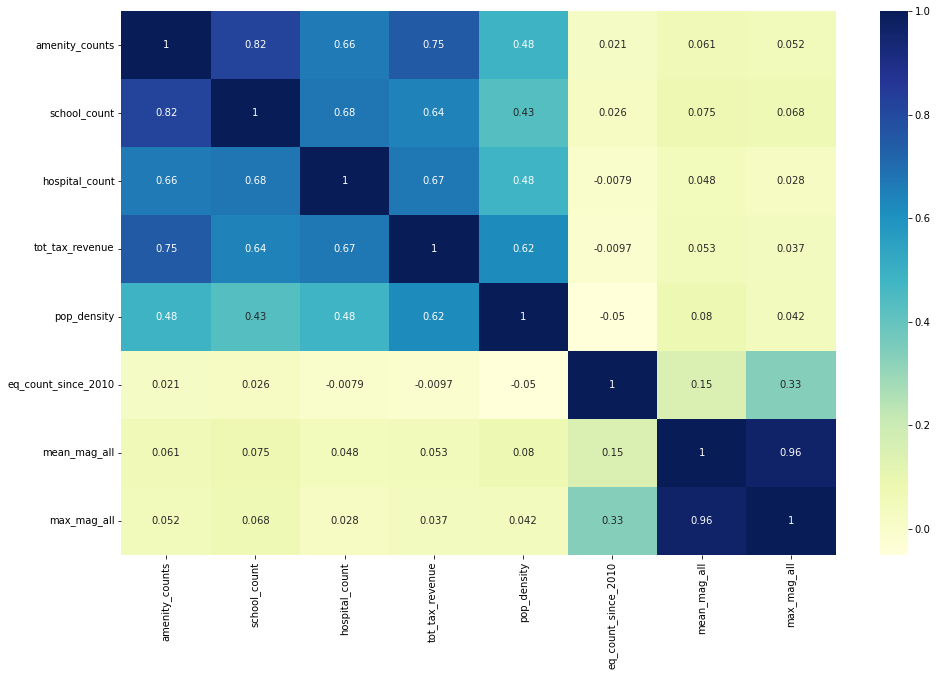

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated
cols = ['amenity_counts', 'school_count','hospital_count', 
        'tot_tax_revenue','pop_density',
        'eq_count_since_2010', 'mean_mag_all', 'max_mag_all']
plt.figure(figsize = (16, 10))
sns.heatmap(data[cols].corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

Data is sparse. USE SVD

In [32]:
from sklearn.decomposition import NMF, TruncatedSVD, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score


In [33]:
data.shape

(1633, 92)

Text(0, 0.5, 'variance explained')

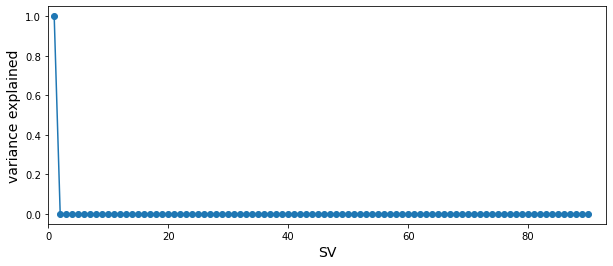

In [34]:
n_components = 90
lsa = TruncatedSVD(n_components=n_components)
doc_topic = lsa.fit_transform(data)
variance = (lsa.explained_variance_ratio_)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(np.arange(1,len(variance)+1), variance,'-o', label='individual')
ax.set_xlim(0, 93)
ax.set_xlabel('SV', fontsize=14)
ax.set_ylabel('variance explained', fontsize=14)

In [35]:
lsa = TruncatedSVD(n_components= 2, random_state=143)
X = lsa.fit_transform(data)
X.shape

(1633, 2)

Text(0, 0.5, 'SV2')

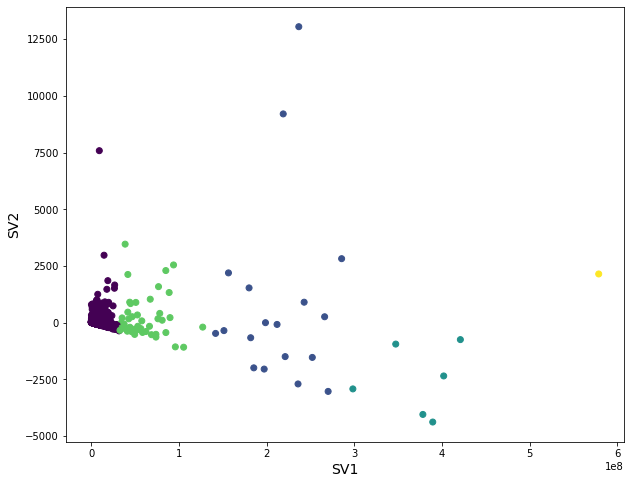

In [36]:
kmeans = KMeans(n_clusters=5, random_state=1337)
y_predict= kmeans.fit_predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_predict)
plt.xlabel('SV1',fontsize=14)
plt.ylabel('SV2', fontsize=14)

In [37]:
data.shape

(1633, 92)

In [38]:
k_start = 2
k_stop = 6
inertias, chs, scs = [],[],[]
centers = []
for k in range(k_start, k_stop+1):
    # YOUR CODE HERE
    kmeans = KMeans(n_clusters=k, random_state=1337)
    y_predict= kmeans.fit_predict(data)
    #raise NotImplementedError() 
    #y = clusterer_k.labels_ #label
    centers.append(kmeans.cluster_centers_) #centering
    inertias.append(kmeans.inertia_) #inertia
    chs.append(calinski_harabasz_score(data,y_predict))
    scs.append(silhouette_score(data,y_predict))

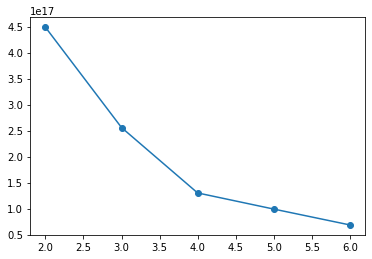

In [39]:
plt.plot(np.arange(2,7), inertias, 'o-')

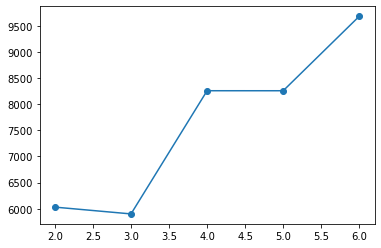

In [40]:
plt.plot(np.arange(2,7), chs, 'o-')

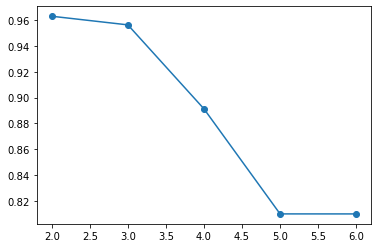

In [41]:
plt.plot(np.arange(2,7), scs, 'o-')

# We will use k=4

Text(0, 0.5, 'SV2')

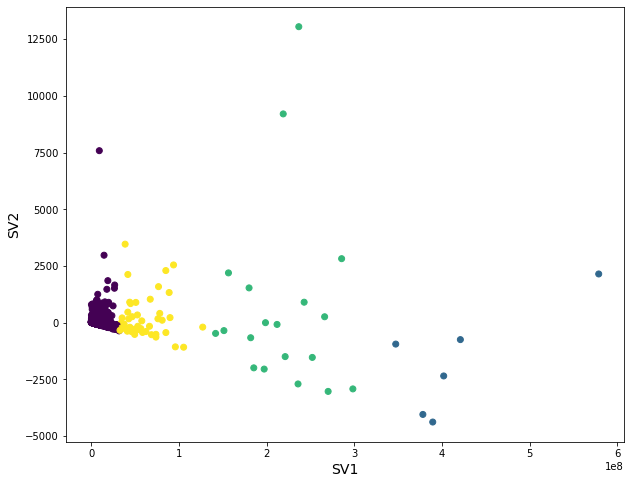

In [42]:
kmeans = KMeans(n_clusters=4, random_state=1337)
y_predict= kmeans.fit_predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_predict)
plt.xlabel('SV1',fontsize=14)
plt.ylabel('SV2', fontsize=14)

In [43]:
data_orig['cluster_label'] = y_predict

In [44]:
data_orig['cluster_label'].value_counts()

0    1562
3      46
2      19
1       6
Name: cluster_label, dtype: int64

In [45]:
data_orig.geom.head(2)

0    MULTIPOLYGON (((120.62709808 17.49300003, 120....
1    MULTIPOLYGON (((120.99041748 17.39801979, 120....
Name: geom, dtype: object

In [46]:
data_orig.drop(columns=['geom'], axis=1, inplace=True)

In [47]:
data_orig.shape

(1633, 102)

 Geom column is damaged! Re run again 

In [48]:
import psycopg2
import geopandas as gpd
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

In [49]:
ph_shp = gpd.read_postgis("""
select *
from gadm.ph
""", con=conn, geom_col='geom')

In [50]:
ph_shp = ph_shp[['name_1', 'name_2', 'geom']]

In [51]:
ph_shp.rename(columns={'name_1': 'province', 'name_2': 'municipality'}, inplace=True)

In [52]:
eq_ph_shp = ph_shp.merge(data_orig, on=['province', 'municipality'], how='left')

In [53]:
eq_ph_shp.columns

Index(['province', 'municipality', 'geom', 'amenity_counts', 'school_count',
       'hospital_count', 'pop', 'tot_tax_revenue', 'tot_current_oper_income',
       'pop_density',
       ...
       'major_2017', 'major_2018', 'major_2019', 'major_2020', 'major_2021',
       'upper_90_mag', 'mean_mag_all', 'max_mag_all', 'eq_count_since_2010',
       'cluster_label'],
      dtype='object', length=103)

No handles with labels found to put in legend.


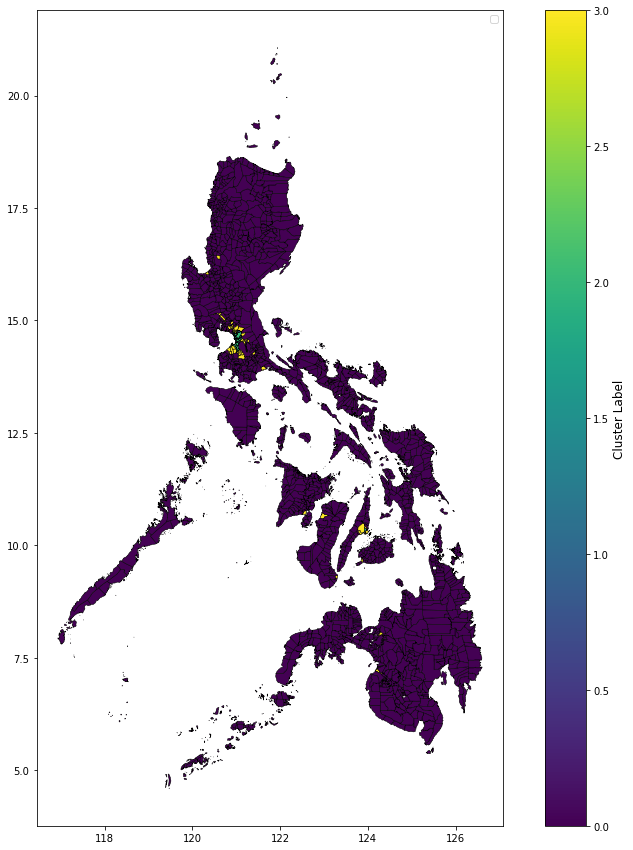

In [54]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
eq_ph_shp.plot(column='cluster_label',
            figsize=(10,10),
            cmap='viridis',
            edgecolor='black',
            linewidth=0.5,
             ax=ax)

# # create the colorbar
norm = colors.Normalize(vmin=0, vmax=3)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label('Cluster Label', fontsize=12)

plt.legend();

# Divide Visayas, Mindandao and Luzon

In [55]:
luzon = ["Abra","Albay","Apayao", "Aurora", "Bataan", "Batangas", "Benguet", "Bulacan",
        "Cagayan", "Camarines Norte", "Camarines Sur", "Cavite", "Ifugao",
         "Ilocos Norte", "Ilocos Sur", "Isabela", "Kalinga", "La Union", "Laguna", 
         "Mountain Province", "Nueva Ecija", "Nueva Vizcaya", "Pampanga", "Pangasinan",
         "Quezon", "Quirino", "Rizal", "Sorsogon", "Tarlac","Zambales"]

len(luzon)

30

In [56]:
eq_ph_shp[eq_ph_shp['province'].isin(luzon)]['province'].nunique()

30

In [57]:
luzon_shp = eq_ph_shp[eq_ph_shp['province'].isin(luzon)]
luzon_shp.shape

(654, 103)

No handles with labels found to put in legend.


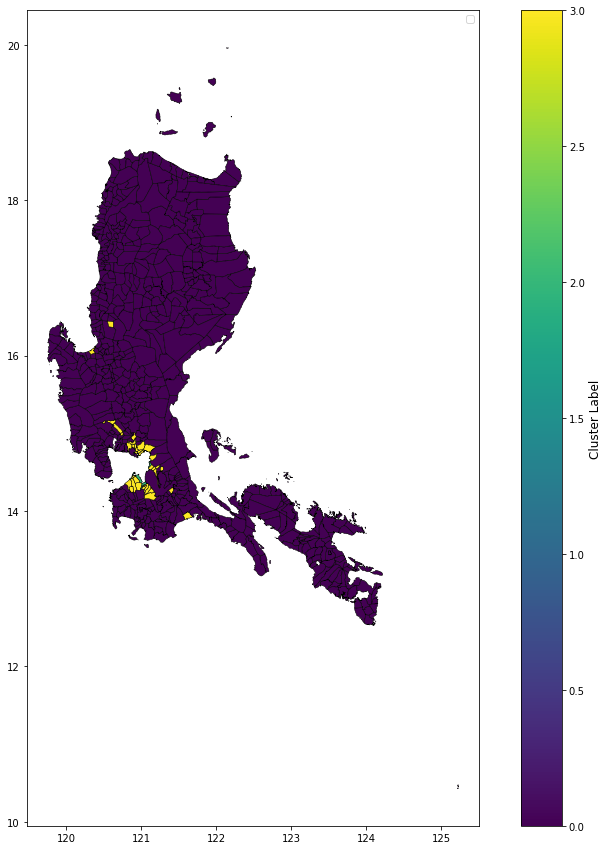

In [58]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
luzon_shp.plot(column='cluster_label',
            figsize=(10,10),
            cmap='viridis',
            edgecolor='black',
            linewidth=0.5,
             ax=ax)

# # create the colorbar
norm = colors.Normalize(vmin=0, vmax=3)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label('Cluster Label', fontsize=12)

plt.legend();

In [59]:
visayas = ["Aklan", "Antique", "Biliran", "Bohol", "Capiz", "Cebu",
            "Eastern Samar", "Guimaras Iloilo", "Leyte", "Negros Occidental",
           "Negros Oriental", "Northern Samar", "Western Samar", "Samar", 
            "Siquijor", "Southern Leyte", "Iloilo"]

visayas_shp = eq_ph_shp[eq_ph_shp['province'].isin(visayas)]
visayas_shp.shape

(404, 103)

In [60]:
len(visayas)

17

In [61]:
eq_ph_shp[eq_ph_shp['province'].isin(visayas)]['province'].nunique()

15

In [62]:
x = eq_ph_shp[eq_ph_shp['province'].isin(visayas)]['province'].unique()

In [63]:
for i in visayas:
    if i not in x:
        print(i)

Guimaras Iloilo
Western Samar


In [64]:
eq_ph_shp[eq_ph_shp['province'].str.contains('Iloilo')].province.unique()

array(['Iloilo'], dtype=object)

In [65]:
eq_ph_shp[eq_ph_shp['province'].str.contains('Samar')].province.unique()

array(['Eastern Samar', 'Northern Samar', 'Samar'], dtype=object)

Western Samar is recorded as Samar.

No handles with labels found to put in legend.


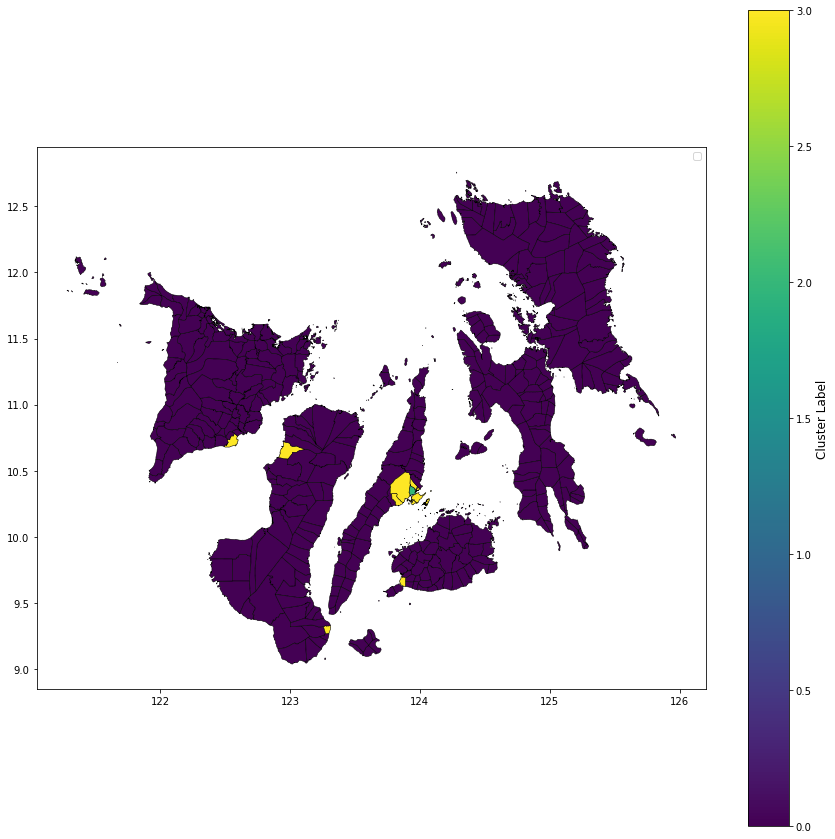

In [66]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
visayas_shp.plot(column='cluster_label',
            figsize=(10,10),
            cmap='viridis',
            edgecolor='black',
            linewidth=0.5,
             ax=ax)

# # create the colorbar
norm = colors.Normalize(vmin=0, vmax=3)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label('Cluster Label', fontsize=12)

plt.legend();

In [67]:
mindanao = ["Agusan del Norte", "Agusan del Sur", "Bukidnon", "Compostela Valley",
            "North Cotabato", "Davao del Norte", "Davao del Sur", "Davao Occidental",
            "Davao Oriental", "Lanao del Norte", "Lanao del Sur", "Maguindanao",
            "Misamis Occidental", "Misamis Oriental", "Sarangani", "South Cotabato",
            "Sultan Kudarat", "Surigao del Norte", "Surigao del Sur", 
            "Zamboanga del Norte", "Zamboanga del Sur", "Zamboanga Sibugay",
            "Basilan", "Camiguin", "Dinagat Islands", "Sulu", "Tawi-Tawi", "Davao"]
mindanao_shp = eq_ph_shp[eq_ph_shp['province'].isin(mindanao)]
mindanao_shp.shape

(456, 103)

In [68]:
x = mindanao_shp['province'].unique()

In [69]:
for i in mindanao:
    if i not in x:
        print(i)

Davao Occidental
Davao


In [70]:
eq_ph_shp[eq_ph_shp.province.str.contains('Cotabato')].province.unique()

array(['North Cotabato', 'South Cotabato'], dtype=object)

In [71]:
eq_ph_shp[eq_ph_shp.province.str.contains('Davao')].province.unique()

array(['Davao del Norte', 'Davao del Sur', 'Davao Oriental'], dtype=object)

**No Davao Occidental in GadM ph**

No handles with labels found to put in legend.


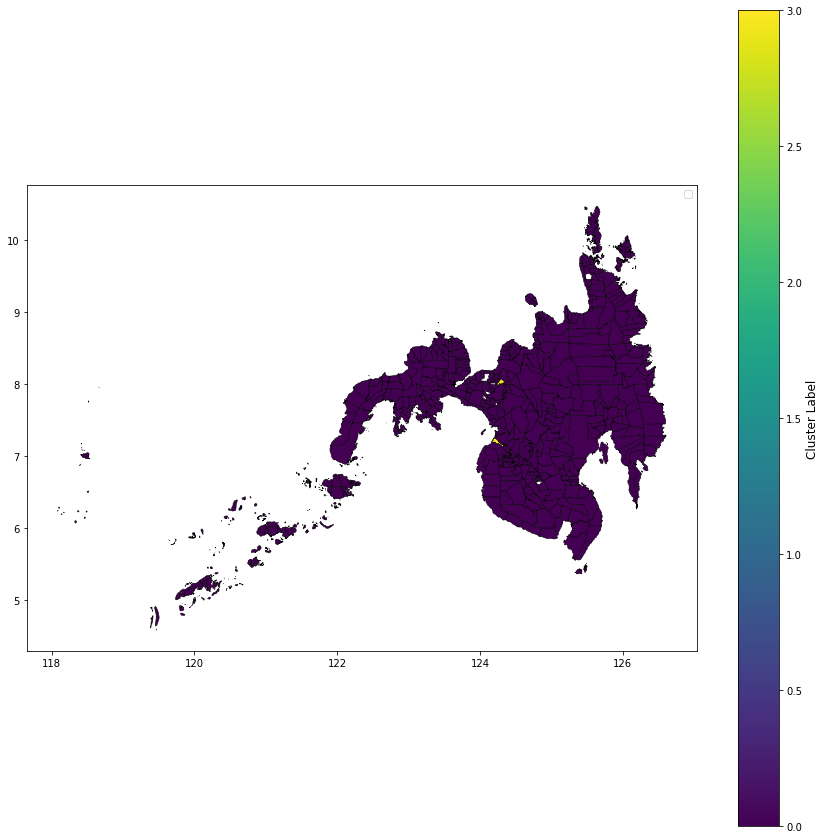

In [72]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
mindanao_shp.plot(column='cluster_label',
            figsize=(10,10),
            cmap='viridis',
            edgecolor='black',
            linewidth=0.5,
             ax=ax)

# # create the colorbar
norm = colors.Normalize(vmin=0, vmax=3)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label('Cluster Label', fontsize=12)

plt.legend();

In [73]:
data_orig['magnitude'].head(3)

0         [5.5]
1           [0]
2    [4.6, 5.3]
Name: magnitude, dtype: object

<AxesSubplot:>

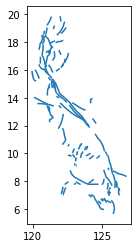

In [74]:
fault = gpd.read_file("gem-global-active-faults/shapefile/gem_active_faults.shp")

# Limit search to PH only and visualize
fault_ph = fault.loc[fault['catalog_na'] == 'philippines']
fault_ph.plot()

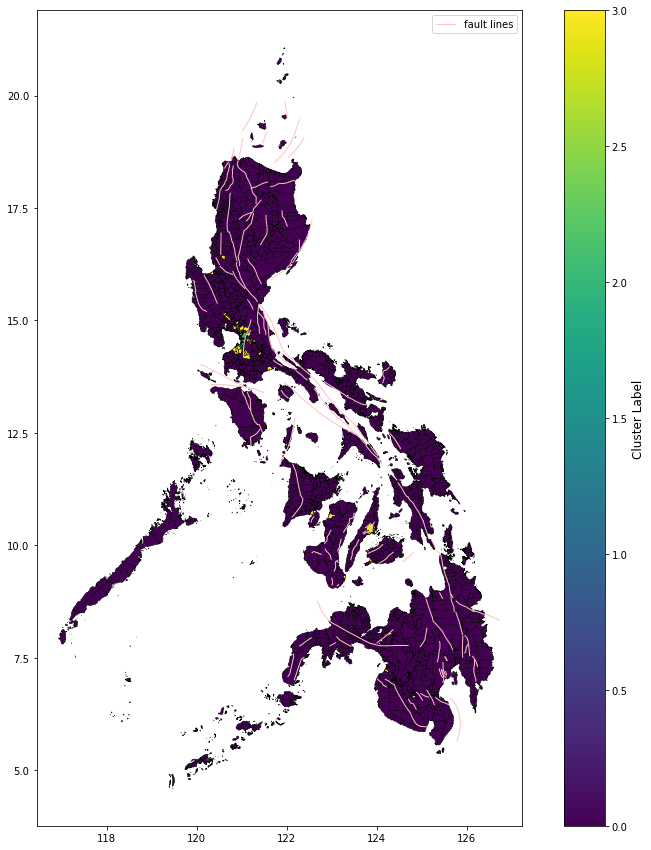

In [75]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
eq_ph_shp.plot(column='cluster_label',
            figsize=(10,10),
            cmap='viridis',
            edgecolor='black',
            linewidth=0.5,
             ax=ax)

# # create the colorbar
norm = colors.Normalize(vmin=0, vmax=3)
cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label('Cluster Label', fontsize=12)
fault_ph.plot(ax=ax, color='pink', lw=1, label='fault lines')
plt.legend();

In [76]:
data_orig['cluster_label'].value_counts()

0    1562
3      46
2      19
1       6
Name: cluster_label, dtype: int64

In [77]:
features2 = ['mean_mag_2010', 'mean_mag_2011', 'mean_mag_2012', 'mean_mag_2013',
       'mean_mag_2014', 'mean_mag_2015', 'mean_mag_2016', 'mean_mag_2017',
       'mean_mag_2018', 'mean_mag_2019', 'mean_mag_2020', 'mean_mag_2021',
       'max_mag_2010', 'max_mag_2011', 'max_mag_2012', 'max_mag_2013',
       'max_mag_2014', 'max_mag_2015', 'max_mag_2016', 'max_mag_2017',
       'max_mag_2018', 'max_mag_2019', 'max_mag_2020', 'max_mag_2021',
       'min_mag_2010', 'min_mag_2011', 'min_mag_2012', 'min_mag_2013',
       'min_mag_2014', 'min_mag_2015', 'min_mag_2016', 'min_mag_2017',
       'min_mag_2018', 'min_mag_2019', 'min_mag_2020', 'min_mag_2021',
       'light_2010', 'light_2011', 'light_2012', 'light_2013', 'light_2014',
       'light_2015', 'light_2016', 'light_2017', 'light_2018', 'light_2019',
       'light_2020', 'light_2021', 'moderate_2010', 'moderate_2011',
       'moderate_2012', 'moderate_2013', 'moderate_2014', 'moderate_2015',
       'moderate_2016', 'moderate_2017', 'moderate_2018', 'moderate_2019',
       'moderate_2020', 'moderate_2021', 'strong_2010', 'strong_2011',
       'strong_2012', 'strong_2013', 'strong_2014', 'strong_2015',
       'strong_2016', 'strong_2017', 'strong_2018', 'strong_2019',
       'strong_2020', 'strong_2021', 'major_2010', 'major_2011', 'major_2012',
       'major_2013', 'major_2014', 'major_2015', 'major_2016', 'major_2017',
       'major_2018', 'major_2019', 'major_2020', 'major_2021',
       'eq_count_since_2010','mean_mag_all', 'max_mag_all']

len(features2)
data2 = data_orig[features2]
data2.head(2)

,mean_mag_2010,mean_mag_2011,mean_mag_2012,mean_mag_2013,mean_mag_2014,mean_mag_2015,mean_mag_2016,mean_mag_2017,mean_mag_2018,mean_mag_2019,mean_mag_2020,mean_mag_2021,max_mag_2010,max_mag_2011,max_mag_2012,max_mag_2013,max_mag_2014,max_mag_2015,max_mag_2016,max_mag_2017,max_mag_2018,max_mag_2019,max_mag_2020,max_mag_2021,min_mag_2010,...,strong_2012,strong_2013,strong_2014,strong_2015,strong_2016,strong_2017,strong_2018,strong_2019,strong_2020,strong_2021,major_2010,major_2011,major_2012,major_2013,major_2014,major_2015,major_2016,major_2017,major_2018,major_2019,major_2020,major_2021,eq_count_since_2010,mean_mag_all,max_mag_all
0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.5,5.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0


(0.0, 1.5)

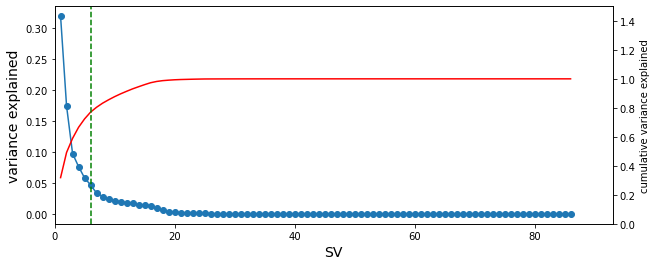

In [78]:
n_components = 86
threshold_variance = 30

lsa = TruncatedSVD(n_components=n_components)
doc_topic = lsa.fit_transform(data2)
variance = (lsa.explained_variance_ratio_)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(np.arange(1,len(variance)+1), variance,'-o', label='individual')
ax.set_xlim(0, 93)
ax.set_xlabel('SV', fontsize=14)
ax.set_ylabel('variance explained', fontsize=14)

ax1 = ax.twinx()
ax1.plot(range(1, len(variance)+1), 
        variance.cumsum(), 'r-', label='cumulative')
ax1.axhline(threshold_variance, ls='--', color='g')
ax1.set_ylabel('cumulative variance explained')
ax1.axvline(k, ls='--', color='g')
ax1.set_ylim(0,1.5)

In [79]:
data2.head()

,mean_mag_2010,mean_mag_2011,mean_mag_2012,mean_mag_2013,mean_mag_2014,mean_mag_2015,mean_mag_2016,mean_mag_2017,mean_mag_2018,mean_mag_2019,mean_mag_2020,mean_mag_2021,max_mag_2010,max_mag_2011,max_mag_2012,max_mag_2013,max_mag_2014,max_mag_2015,max_mag_2016,max_mag_2017,max_mag_2018,max_mag_2019,max_mag_2020,max_mag_2021,min_mag_2010,...,strong_2012,strong_2013,strong_2014,strong_2015,strong_2016,strong_2017,strong_2018,strong_2019,strong_2020,strong_2021,major_2010,major_2011,major_2012,major_2013,major_2014,major_2015,major_2016,major_2017,major_2018,major_2019,major_2020,major_2021,eq_count_since_2010,mean_mag_all,max_mag_all
0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.50,5.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00,0.0
2,0.0,0.0,4.6,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4.95,5.3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00,0.0


In [80]:
x = variance.cumsum()
x

array([0.31852765, 0.49220733, 0.58945788, 0.66567691, 0.72369203,
       0.77039428, 0.80397857, 0.83202749, 0.8554259 , 0.87698861,
       0.89636059, 0.91398704, 0.93080977, 0.94559846, 0.95993586,
       0.97308993, 0.98183941, 0.98747211, 0.99084943, 0.99346171,
       0.99523987, 0.99634199, 0.99741302, 0.99827392, 0.99904261,
       0.99924842, 0.99938711, 0.99950624, 0.99961295, 0.99971046,
       0.99978472, 0.9998459 , 0.99988894, 0.9999241 , 0.99994958,
       0.99996209, 0.99997193, 0.99997985, 0.99998573, 0.99998931,
       0.99999219, 0.99999476, 0.99999694, 0.99999788, 0.99999856,
       0.999999  , 0.99999934, 0.99999955, 0.99999973, 0.99999989,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [81]:
idx = np.where(x >= 0.80)

In [82]:
idx

(array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
        74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]),)

In [83]:
lsa = TruncatedSVD(n_components= 7, random_state=143)
X = lsa.fit_transform(data2)
X.shape

(1633, 7)

In [84]:
k_start = 2
k_stop = 10
inertias, chs, scs = [],[],[]
centers = []
for k in range(k_start, k_stop+1):
    # YOUR CODE HERE
    kmeans = KMeans(n_clusters=k, random_state=1337)
    y_predict= kmeans.fit_predict(data2)
    #raise NotImplementedError() 
    #y = clusterer_k.labels_ #label
    centers.append(kmeans.cluster_centers_) #centering
    inertias.append(kmeans.inertia_) #inertia
    chs.append(calinski_harabasz_score(data,y_predict))
    scs.append(silhouette_score(data,y_predict))
    

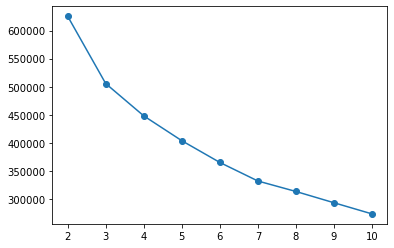

In [85]:
plt.plot(np.arange(2,11), inertias, 'o-')

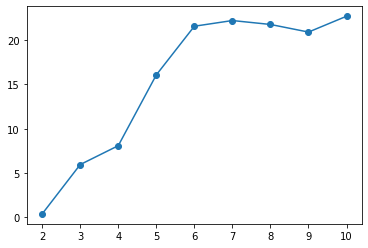

In [86]:
plt.plot(np.arange(2,11), chs, 'o-')

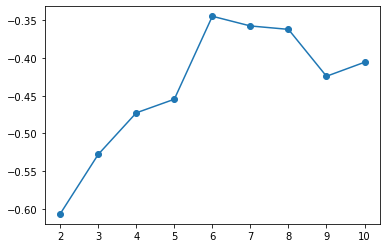

In [87]:
plt.plot(np.arange(2,11), scs, 'o-')

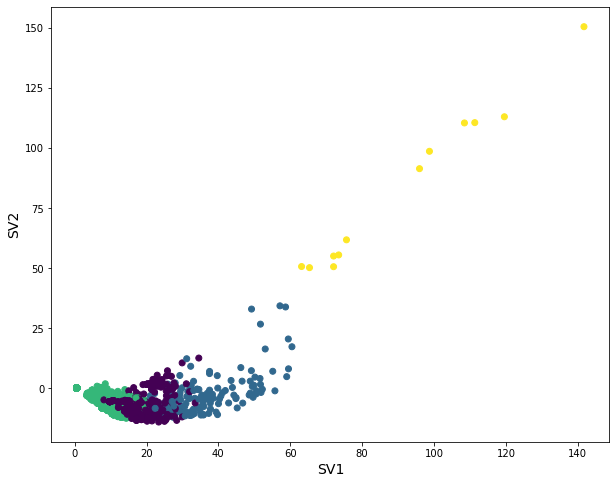

In [88]:
kmeans = KMeans(n_clusters=4, random_state=1337)
y_predict= kmeans.fit_predict(X)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_predict)
plt.xlabel('SV1',fontsize=14)
plt.ylabel('SV2', fontsize=14)

data2['cluster_label'] = y_predict

In [89]:
data2['cluster_label2'] = y_predict

In [90]:
data_orig['cluster_label2']= y_predict

In [91]:
ph_shp.head(2)

,province,municipality,geom
0,Abra,Bangued,"MULTIPOLYGON (((120.62710 17.49300, 120.62177 ..."
1,Abra,Boliney,"MULTIPOLYGON (((120.99042 17.39802, 120.98631 ..."


In [92]:
eq_ph_df = eq_ph_shp.merge(data_orig[['province', 'municipality', 'cluster_label2']], on=['province', 'municipality'], how='left')

In [93]:
eq_ph_df.columns

Index(['province', 'municipality', 'geom', 'amenity_counts', 'school_count',
       'hospital_count', 'pop', 'tot_tax_revenue', 'tot_current_oper_income',
       'pop_density',
       ...
       'major_2018', 'major_2019', 'major_2020', 'major_2021', 'upper_90_mag',
       'mean_mag_all', 'max_mag_all', 'eq_count_since_2010', 'cluster_label',
       'cluster_label2'],
      dtype='object', length=104)

In [94]:
luzon_shp = eq_ph_df[eq_ph_df['province'].isin(luzon)]
visayas_shp = eq_ph_df[eq_ph_df['province'].isin(visayas)]
mindanao_shp = eq_ph_df[eq_ph_df['province'].isin(mindanao)]

In [96]:
import matplotlib as mpl

No handles with labels found to put in legend.


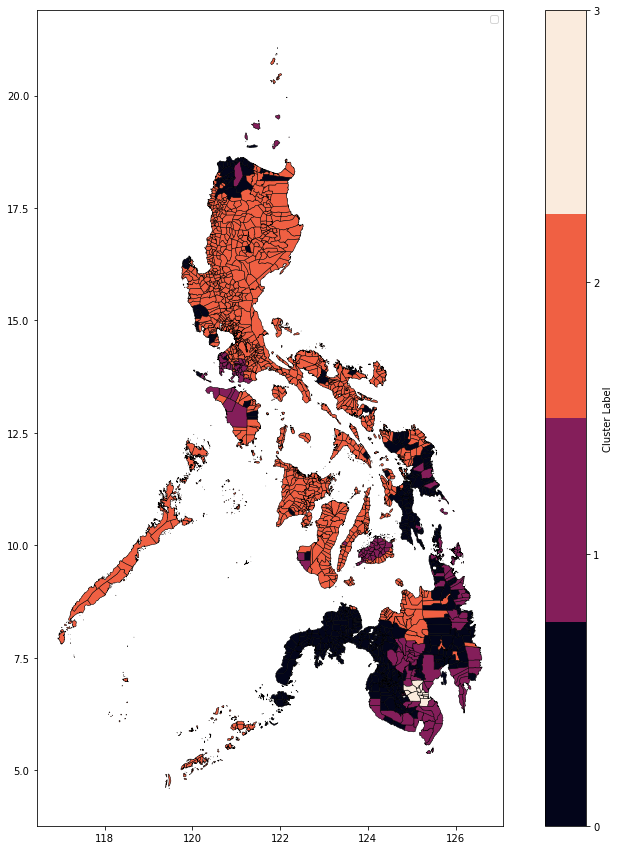

In [106]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
eq_ph_df.plot(column='cluster_label2',
            figsize=(10,10),
            cmap='rocket',
            edgecolor='black',
            linewidth=0.5,
             ax=ax)

cmap = plt.get_cmap('rocket',4)
norm = mpl.colors.Normalize(vmin=0,vmax=3)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(0,4), label='Cluster Label')

plt.legend()
plt.savefig('cluster_philippines.png', dpi=300);

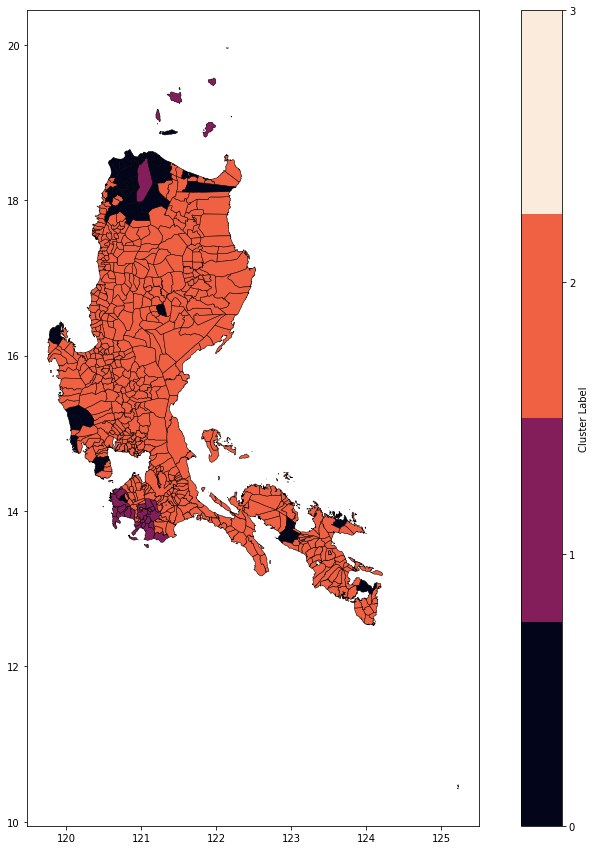

In [107]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
luzon_shp.plot(column='cluster_label2',
            figsize=(10,10),
            cmap='rocket',
            edgecolor='black',
            linewidth=0.5,
             ax=ax, vmin=0, vmax=3)


cmap = plt.get_cmap('rocket',4)
norm = mpl.colors.Normalize(vmin=0,vmax=3)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(0,4), label='Cluster Label')
plt.savefig('cluster_luzon.png', dpi=300);

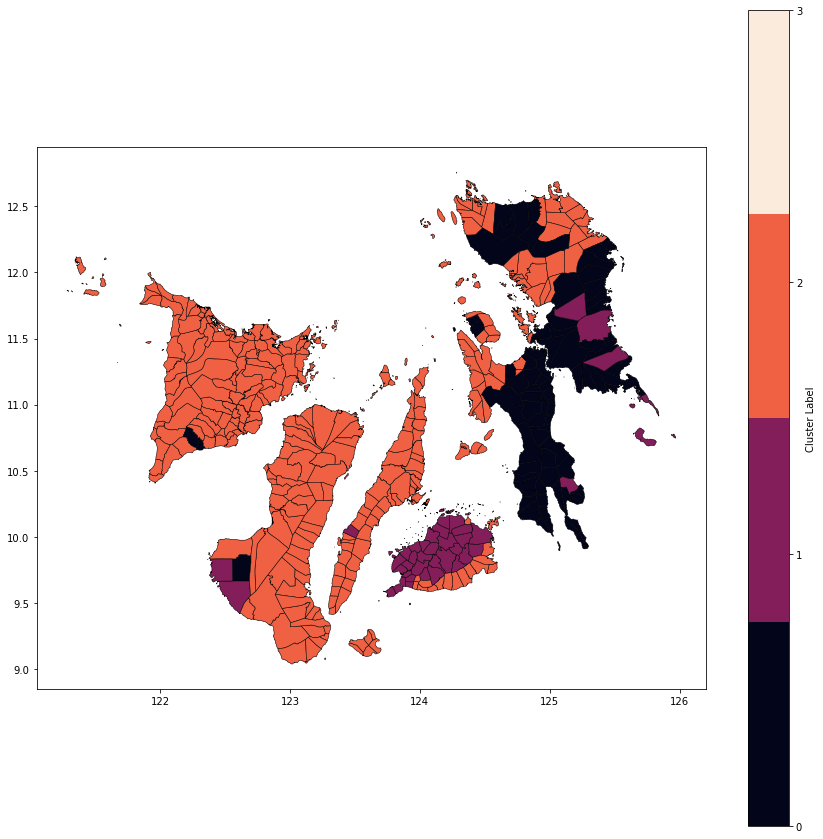

In [108]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
visayas_shp.plot(column='cluster_label2',
            figsize=(10,10),
            cmap='rocket',
            edgecolor='black',
            linewidth=0.5,
             ax=ax, vmin=0, vmax=3)


cmap = plt.get_cmap('rocket',4)
norm = mpl.colors.Normalize(vmin=0,vmax=3)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(0,4), label='Cluster Label')
plt.savefig('cluster_visayas.png', dpi=300)
plt.show();

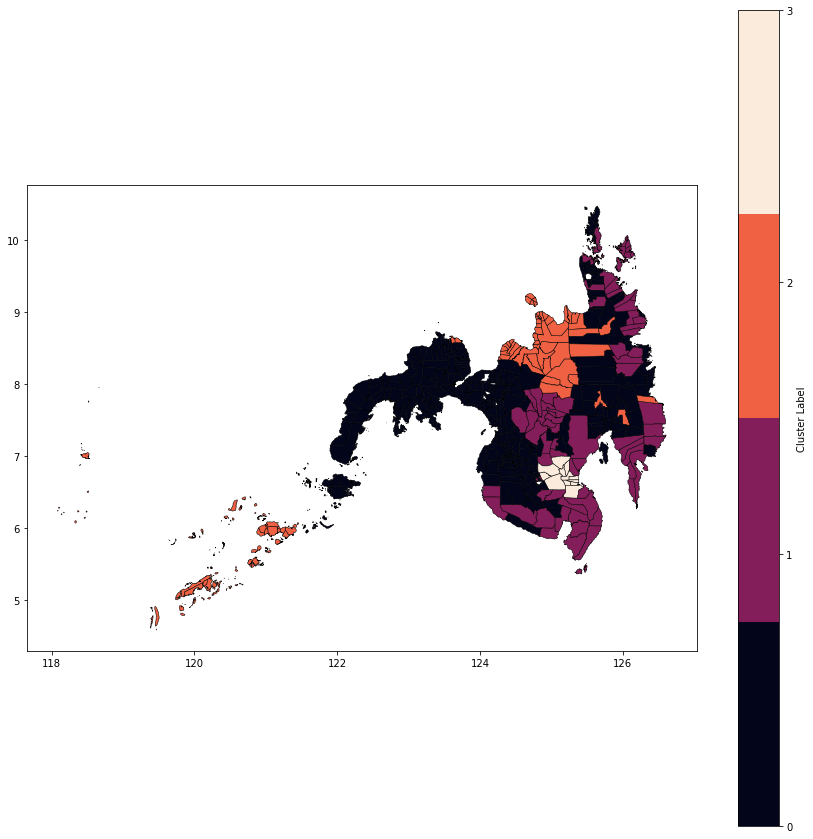

In [109]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
mindanao_shp.plot(column='cluster_label2',
            figsize=(10,10),
            cmap='rocket',
            edgecolor='black',
            linewidth=0.5,
             ax=ax, vmin=0, vmax=3)

# # create the colorbar

cmap = plt.get_cmap('rocket',4)
norm = mpl.colors.Normalize(vmin=0,vmax=3)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.arange(0,4), label='Cluster Label')
plt.savefig('cluster_mindanao.png', dpi=300);

In [110]:
island = []

for i in eq_ph_df['province'].tolist():
    if i in mindanao:
        island.append('Mindanao')
    elif i in luzon:
        island.append('Luzon')
    elif i in visayas:
        island.append('Visayas')
    else:
        island.append('None')

In [111]:
eq_ph_df['island'] = island

In [112]:
eq_ph_df.to_csv('eq_cluster_labels.csv')

In [247]:
eq_shp = eq_ph_df[['geom', 'cluster_label2', 'province', 'municipality']]

In [248]:
eq_shp.to_file('eq_cluster.shp')